In [ ]:

!pip install tensorflow keras opencv-python matplotlib seaborn scikit-learn


In [6]:
import tensorflow as tf
print("✅ TensorFlow Version:", tf.__version__)
print("💻 GPU Available:", tf.config.list_physical_devices('GPU'))


✅ TensorFlow Version: 2.12.0
💻 GPU Available: []


In [26]:
import os

# Apna dataset path yah daalo 👇
dataset_dir = r"C:\Users\hp\Data Science m.tech\B.tech Crop\dataset"

print("Dataset path exists:", os.path.exists(dataset_dir))
print("Total crop folders:", len(os.listdir(dataset_dir)))
print("Example folders:", os.listdir(dataset_dir)[:5])


Dataset path exists: True
Total crop folders: 17
Example folders: ['.ipynb_checkpoints', 'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'PlantVillage', 'Potato___Early_blight']


In [8]:
!pip install split-folders

In [4]:
!pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 558.9 kB/s eta 0:00:03
   ----------- ---------------------------- 0.5/1.8 MB 558.9 kB/s eta 0:00:03
   ----------------- ---------------------- 0.8/1.8 MB 532.8 kB/s eta 0:00:02
   ----------------- ---------------------- 0.8/1.8 MB 532.8 kB/s eta 0:00:02
   ----------------- ---------------------- 0.8/1.8 MB 532.8 kB/s eta 0:00:02
   ----------------- ---------------------- 0.8/1.8 MB 532


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: To modify pip, please run the following command:
C:\Users\hp\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [5]:
!pip install split-folders



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import splitfolders

input_folder = r"C:\Users\hp\Data Science m.tech\B.tech Crop\dataset"
output_folder = r"C:\Users\hp\Data Science m.tech\B.tech Crop\split_dataset"

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .2))


Copying files: 6370 files [00:17, 354.98 files/s]


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
train_dir = r"C:\Users\hp\Data Science m.tech\B.tech Crop\split_dataset\train"
val_dir = r"C:\Users\hp\Data Science m.tech\B.tech Crop\split_dataset\val"

# Data Augmentation for training

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# ===============================
# 3️⃣ Load Data
# ===============================
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 5090 images belonging to 17 classes.
Found 1280 images belonging to 17 classes.


In [29]:
import numpy as np
from sklearn.utils import class_weight

num_classes = train_generator.num_classes  # 17
train_classes = train_generator.classes

# Compute class weights for existing classes
cw = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_classes),
    y=train_classes
)

# Start with all weights = 1.0
class_weights_dict = {i: 1.0 for i in range(num_classes)}

# Replace weights for present classes
for idx, weight in zip(np.unique(train_classes), cw):
    class_weights_dict[idx] = weight

print("Fixed class weights dict:", class_weights_dict)


Fixed class weights dict: {0: 1.0, 1: 1.1948356807511737, 2: 1.1581342434584756, 3: 1.0, 4: 1.1311111111111112, 5: 1.0408997955010224, 6: 2.8044077134986227, 7: 1.0039447731755424, 8: 0.9807321772639692, 9: 0.9612842304060434, 10: 0.9322344322344323, 11: 0.8276422764227642, 12: 0.800314465408805, 13: 0.7747336377473364, 14: 1.1782407407407407, 15: 1.138702460850112, 16: 0.6692965154503616}


In [12]:
/* from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

#  Build CNN Model

# Improved CNN Model

model = Sequential([
    # 1st Conv Block
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3), padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    # 2nd Conv Block
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    # 3rd Conv Block
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    # 4th Conv Block
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),

    # Fully Connected Layers
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

*/

In [31]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

# Load pretrained model (Transfer Learning)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Build final model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


9406464/9406464 [==============================] - 50s 5us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_3 (Dense)             (None, 128)               163968    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 17)                2193      
                                                        

In [32]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [33]:
print("Unique classes in train:", np.unique(train_generator.classes))
print("Number of classes:", len(np.unique(train_generator.classes)))


Unique classes in train: [ 1  2  4  5  6  7  8  9 10 11 12 13 14 15 16]
Number of classes: 15


In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [35]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    class_weight=class_weights_dict,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/50
160/160 [==============================] - 226s 1s/step - loss: 2.4831 - accuracy: 0.2250 - val_loss: 1.9215 - val_accuracy: 0.4828 - lr: 1.0000e-04
Epoch 2/50
160/160 [==============================] - 162s 1s/step - loss: 1.6842 - accuracy: 0.4652 - val_loss: 1.3902 - val_accuracy: 0.6305 - lr: 1.0000e-04
Epoch 3/50
160/160 [==============================] - 167s 1s/step - loss: 1.3290 - accuracy: 0.5739 - val_loss: 1.1368 - val_accuracy: 0.6922 - lr: 1.0000e-04
Epoch 4/50
160/160 [==============================] - 151s 940ms/step - loss: 1.1286 - accuracy: 0.6312 - val_loss: 0.9724 - val_accuracy: 0.7297 - lr: 1.0000e-04
Epoch 5/50
160/160 [==============================] - 150s 934ms/step - loss: 0.9893 - accuracy: 0.6762 - val_loss: 0.8531 - val_accuracy: 0.7523 - lr: 1.0000e-04
Epoch 6/50
160/160 [==============================] - 177s 1s/step - loss: 0.8924 - accuracy: 0.6971 - val_loss: 0.7954 - val_accuracy: 0.7656 - lr: 1.0000e-04
Epoch 7/50
160/160 [==============

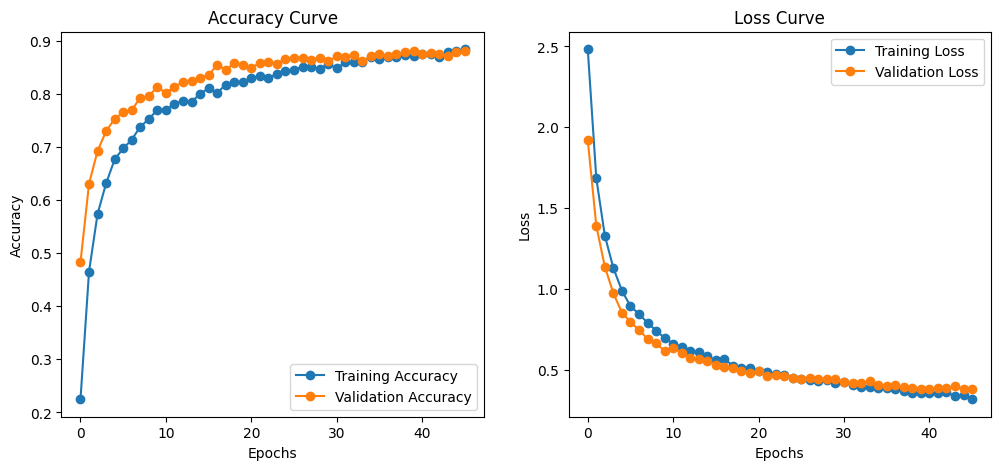

In [37]:
import matplotlib.pyplot as plt

# 1️⃣ Plot Accuracy & Loss Curves
# -------------------------------
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Reset generator
val_generator.reset()

# Predict
predictions = model.predict(val_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = val_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
target_names = [k for k,v in sorted(val_generator.class_indices.items(), key=lambda item: item[1])]
cr = classification_report(y_true, y_pred, labels=list(range(len(target_names))), target_names=target_names)
print("\nClassification Report:\n", cr)


40/40 [==============================] - 30s 704ms/step
Confusion Matrix:
 [[ 70   1   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  2  71   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  1   0  72   2   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   1  73   3   1   1   1   0   0   0   1   0   0   0]
 [  0   0   0   0  29   0   0   0   0   0   1   0   0   0   1]
 [  0   0   0   0   0  76   1   1   0   1   0   6   0   0   0]
 [  3   0   1   1   0   1  57   6   3   4   2   7   1   0   1]
 [  0   0   0   1   0   0   6  77   4   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0  87   1   1   1   1   0   0]
 [  1   0   0   0   0   5   3   0   3  87   0   4   0   0   0]
 [  1   0   0   0   0   1   0   1   5   2  73  15   0   3   6]
 [  0   0   0   0   0   0   5   1   1   3   5  86   0   0   9]
 [  0   0   0   0   0   0   0   0   1   0   0   0  71   0   0]
 [  0   0   0   0   0   0   0   0   4   4   0   0   0  67   0]
 [  0   0   0   0   0   0   0   0   1   0  

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

OSError: No file or directory found at crop_disease_model.h5

In [39]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"\n✅ Validation Accuracy: {val_acc*100:.2f}%")

model.save("crop_disease_model.h5")
print("💾 Model saved successfully as 'crop_disease_model.h5'")

40/40 [==============================] - 29s 711ms/step - loss: 0.3784 - accuracy: 0.8750

✅ Validation Accuracy: 87.50%
💾 Model saved successfully as 'crop_disease_model.h5'
